# Multi-class Classification

## 1. Import and become one with the data

In [1]:
import zipfile

from bleach.callbacks import target_blank

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-11-30 23:11:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.221.155, 142.251.221.123, 142.251.223.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.221.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  3.16MB/s    in 2m 49s  

2023-11-30 23:14:39 (2.92 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [1]:
import os 

for dirpath, dirnames, filenames in os.walk("/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data'.
there are 10 directories and 0 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/hamburger'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/fried_rice'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 ima

In [2]:
train_dir = "/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/"
test_dir = "/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/test/"

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [4]:
# Function to visualize images in a grid format
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

Image shape: (512, 512, 3)


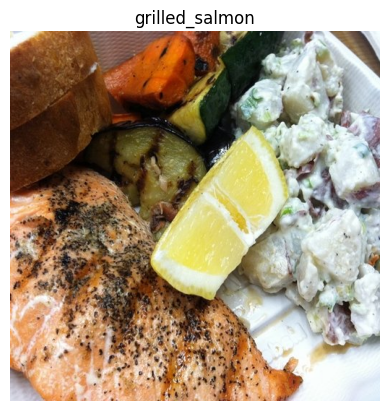

In [5]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir, # target directory
    target_size=(224,224), # target image size
    batch_size=32, # batch size (32 is default)
    class_mode="categorical", # type of problem we're working on
)

# Create test data generator and load in test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create a CNN model (same as Tiny VGG)
model = Sequential(
    [
        Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation="relu"),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10,activation="softmax")
    ]     
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


2023-12-01 20:38:32.239715: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-01 20:38:33.189987: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-01 20:38:33.190060: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-01 20:38:33.193815: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

## 4. Fit a model

In [8]:
summary = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-12-01 20:38:41.070376: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:38:41.090112: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:38:41.587368: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:38:41.605979: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:38:41.609366: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:38:41.611894: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1171 - accuracy: 0.2260

2023-12-01 20:39:37.671325: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:39:37.680414: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:39:37.796381: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:39:37.800285: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:39:37.802402: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:39:37.803811: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 62s 260ms/step - loss: 2.1171 - accuracy: 0.2260 - val_loss: 2.0316 - val_accuracy: 0.3012
Epoch 2/5


2023-12-01 20:39:43.266257: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:39:43.273760: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:39:43.276176: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:39:43.278044: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.8525 - accuracy: 0.3597

2023-12-01 20:40:41.072028: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:40:41.086007: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:40:41.091101: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:40:41.093553: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:40:41.095586: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 63s 268ms/step - loss: 1.8525 - accuracy: 0.3597 - val_loss: 1.8515 - val_accuracy: 0.3508
Epoch 3/5


2023-12-01 20:40:46.264934: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:40:46.272323: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:40:46.275132: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:40:46.277846: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.4727 - accuracy: 0.5083

2023-12-01 20:41:42.581626: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:41:42.590511: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:41:42.595593: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:41:42.597947: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:41:42.599724: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 61s 258ms/step - loss: 1.4727 - accuracy: 0.5083 - val_loss: 1.9798 - val_accuracy: 0.3208
Epoch 4/5


2023-12-01 20:41:47.034516: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:41:47.042491: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:41:47.045022: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:41:47.046916: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.8595 - accuracy: 0.7229

2023-12-01 20:42:42.469602: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:42:42.478285: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:42:42.483259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:42:42.486284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:42:42.488365: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 60s 255ms/step - loss: 0.8595 - accuracy: 0.7229 - val_loss: 2.3976 - val_accuracy: 0.2896
Epoch 5/5


2023-12-01 20:42:47.065706: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:42:47.073847: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:42:47.076301: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:42:47.078318: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.3189 - accuracy: 0.9077

2023-12-01 20:43:43.382958: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:43:43.393241: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:43:43.397864: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:43:43.400208: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:43:43.402272: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 61s 259ms/step - loss: 0.3189 - accuracy: 0.9077 - val_loss: 3.5825 - val_accuracy: 0.2820


## 5. Evaluate the model

In [9]:
model.evaluate(test_data)

 1/79 [..............................] - ETA: 12s - loss: 3.5513 - accuracy: 0.2500

2023-12-01 20:51:34.781157: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:51:34.792207: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:51:34.797546: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:51:34.800850: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 20:51:34.803213: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


79/79 [==============================] - 5s 60ms/step - loss: 3.5825 - accuracy: 0.2820


[3.582520008087158, 0.28200000524520874]

In [10]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    :param history: 
    :return: Graph
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='Training_loss')
    plt.plot(epochs, val_loss, label='Label_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Training_accuracy")
    plt.plot(epochs, val_accuracy, label="Val_accuracy")
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

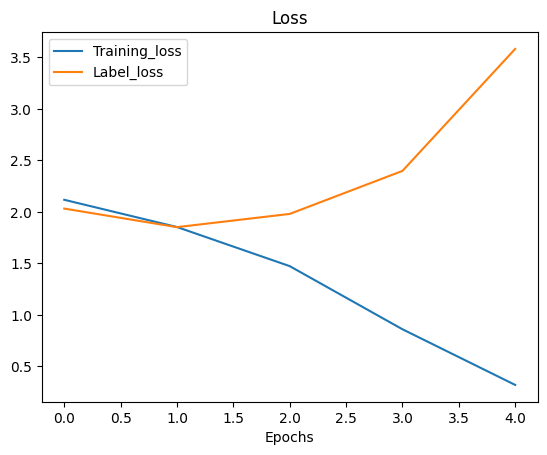

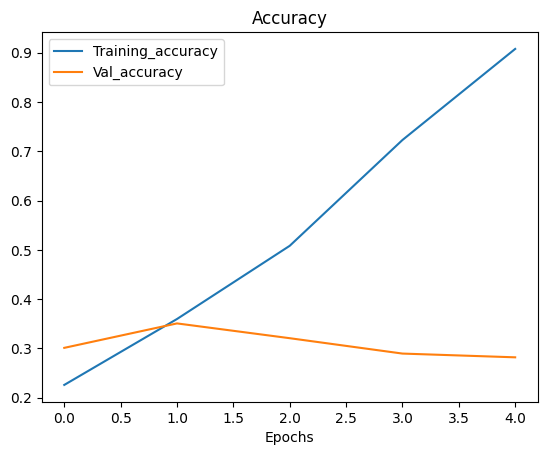

In [11]:
plot_loss_curves(summary)

## 6. Adjust the model parameters

 ##### > Get more data
 ##### > Simplify model
 ##### > Use data augmentation
 ##### > Use transfer learning 

In [12]:
# Try a simplified model (remove two layers)
model = Sequential(
    [
        Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
        MaxPool2D(),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(10,activation="softmax")
    ]
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

summary = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-12-01 21:28:24.387430: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:24.395963: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:24.737088: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:24.743615: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:24.745597: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:24.747063: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1849 - accuracy: 0.2157

2023-12-01 21:28:48.778329: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:48.787805: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:48.870280: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:48.873917: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:48.875843: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:48.877266: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 30s 124ms/step - loss: 2.1849 - accuracy: 0.2157 - val_loss: 2.0422 - val_accuracy: 0.2640
Epoch 2/5
  1/235 [..............................] - ETA: 39s - loss: 1.9319 - accuracy: 0.2812

2023-12-01 21:28:54.249965: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:54.256099: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:54.258271: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:28:54.259813: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.8283 - accuracy: 0.3696

2023-12-01 21:29:17.664889: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:17.673271: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:17.677677: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:17.680589: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:17.682720: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 114ms/step - loss: 1.8283 - accuracy: 0.3696 - val_loss: 1.9543 - val_accuracy: 0.3192
Epoch 3/5
  1/235 [..............................] - ETA: 39s - loss: 1.4429 - accuracy: 0.5312

2023-12-01 21:29:21.210964: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:21.216937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:21.219230: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:21.220892: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.4344 - accuracy: 0.5297

2023-12-01 21:29:44.665696: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:44.674126: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:44.678277: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:44.680332: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:44.681941: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 114ms/step - loss: 1.4344 - accuracy: 0.5297 - val_loss: 2.1131 - val_accuracy: 0.3020
Epoch 4/5
  1/235 [..............................] - ETA: 39s - loss: 0.8735 - accuracy: 0.8125

2023-12-01 21:29:48.130970: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:48.137010: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:48.139218: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:29:48.140737: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.9393 - accuracy: 0.7047

2023-12-01 21:30:11.609052: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:11.617455: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:11.622544: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:11.625403: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:11.627334: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 115ms/step - loss: 0.9393 - accuracy: 0.7047 - val_loss: 2.3749 - val_accuracy: 0.2928
Epoch 5/5
  1/235 [..............................] - ETA: 42s - loss: 0.5375 - accuracy: 0.8750

2023-12-01 21:30:15.190095: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:15.197547: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:15.199738: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:15.201208: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.5142 - accuracy: 0.8535

2023-12-01 21:30:38.548300: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:38.557153: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:38.561424: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:38.563487: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:30:38.565320: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 27s 114ms/step - loss: 0.5142 - accuracy: 0.8535 - val_loss: 2.8346 - val_accuracy: 0.2844


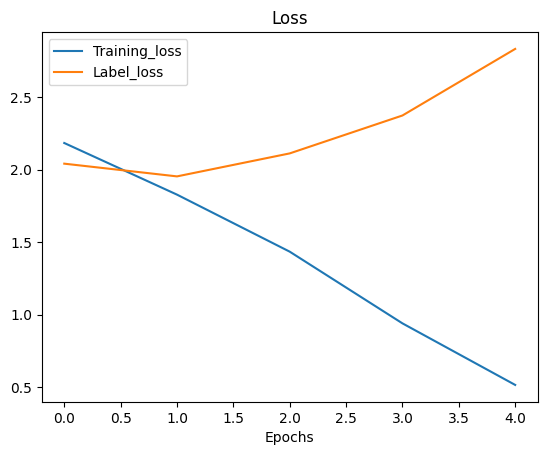

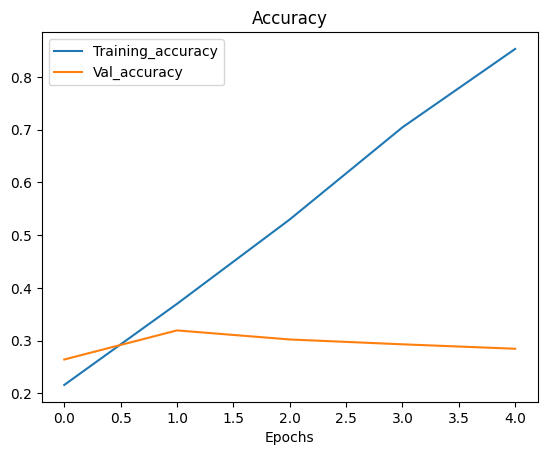

In [13]:
plot_loss_curves(summary)

In [15]:
# Still Overfitting with simplify model
# Try use augmentation

train_augment_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augment = train_augment_generator.flow_from_directory(
    train_dir, target_size=(224,224), batch_size=32, class_mode="categorical"
)

Found 7500 images belonging to 10 classes.


In [16]:
# Clone prev model
model_newest = tf.keras.models.clone_model(model)

# Compile the cloned model
model_newest.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

summary_new = model_newest.fit(
    train_data_augment,
    epochs=5,
    steps_per_epoch=len(train_data_augment),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-12-01 21:46:19.258361: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:46:19.266749: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:46:19.543769: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:46:19.548685: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:46:19.550706: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:46:19.552127: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.3132 - accuracy: 0.1703

2023-12-01 21:47:26.337016: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:47:26.345116: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:47:26.413872: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:47:26.417225: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:47:26.419343: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:47:26.420727: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 71s 300ms/step - loss: 2.3132 - accuracy: 0.1703 - val_loss: 2.0432 - val_accuracy: 0.2560
Epoch 2/5


2023-12-01 21:47:30.139604: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:47:30.147482: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:47:30.149725: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:47:30.151257: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.0826 - accuracy: 0.2540

2023-12-01 21:48:29.354745: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:48:29.362823: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:48:29.367121: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:48:29.369133: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:48:29.370646: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 63s 266ms/step - loss: 2.0826 - accuracy: 0.2540 - val_loss: 1.9328 - val_accuracy: 0.3204
Epoch 3/5


2023-12-01 21:48:32.789905: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:48:32.796261: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:48:32.798656: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:48:32.800374: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.0096 - accuracy: 0.3020

2023-12-01 21:49:38.351920: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:49:38.360062: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:49:38.364411: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:49:38.366424: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:49:38.368003: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 69s 294ms/step - loss: 2.0096 - accuracy: 0.3020 - val_loss: 1.9007 - val_accuracy: 0.3292
Epoch 4/5


2023-12-01 21:49:41.917732: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:49:41.925853: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:49:41.928082: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:49:41.929647: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.9667 - accuracy: 0.3140

2023-12-01 21:50:41.938708: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:50:41.946557: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:50:41.950593: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:50:41.952595: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:50:41.954082: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 63s 269ms/step - loss: 1.9667 - accuracy: 0.3140 - val_loss: 1.8588 - val_accuracy: 0.3536
Epoch 5/5


2023-12-01 21:50:45.312861: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:50:45.321052: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:50:45.323064: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:50:45.324424: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.9217 - accuracy: 0.3371

2023-12-01 21:51:43.104792: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:51:43.112870: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:51:43.117340: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:51:43.119388: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-01 21:51:43.120966: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 61s 260ms/step - loss: 1.9217 - accuracy: 0.3371 - val_loss: 1.8392 - val_accuracy: 0.3760


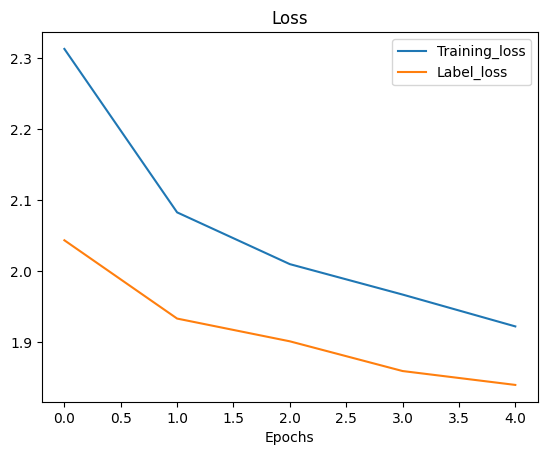

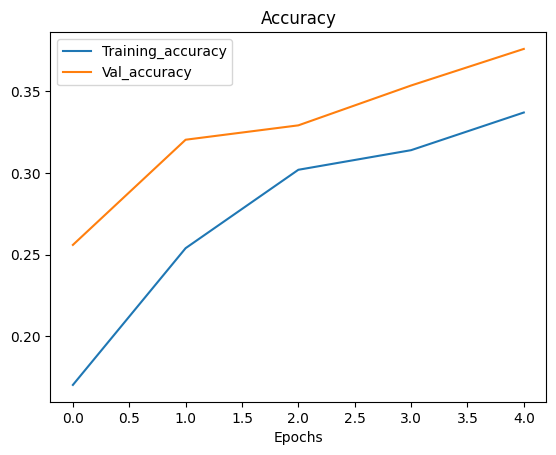

In [17]:
plot_loss_curves(summary_new)